In [9]:
# Generic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
train_df=pd.read_csv("C:/Users/Nagi/Documents/Hackathon/Train.csv")
test_df=pd.read_csv("C:/Users/Nagi/Documents/Hackathon/Test.csv")
submission_df=pd.read_csv("C:/Users/Nagi/Documents/Hackathon/Decision_Tree.csv")

In [11]:
print("Train size : rows",train_df.shape[0]," and columns",train_df.shape[1])
print("Test size : rows",test_df.shape[0]," and columns",test_df.shape[1])
print("Submission size : rows",submission_df.shape[0]," and columns",submission_df.shape[1])

Train size : rows 33750  and columns 15
Test size : rows 14454  and columns 14
Submission size : rows 14454  and columns 2


In [5]:
train_df.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [6]:
train_df.columns.difference(test_df.columns)

Index(['traffic_volume'], dtype='object')

In [7]:
train_df["source"] = "train"
test_df["source"] = "test"
df = pd.concat([train_df,test_df])

C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df['date_time'].head()

0    2012-10-02 09:00:00
1    2012-10-02 10:00:00
2    2012-10-02 11:00:00
3    2012-10-02 12:00:00
4    2012-10-02 13:00:00
Name: date_time, dtype: object

In [7]:
df.dtypes

air_pollution_index      int64
clouds_all               int64
date_time               object
dew_point                int64
humidity                 int64
is_holiday              object
rain_p_h               float64
snow_p_h               float64
source                  object
temperature            float64
traffic_volume         float64
visibility_in_miles      int64
weather_description     object
weather_type            object
wind_direction           int64
wind_speed               int64
dtype: object

In [8]:
df.shape

(48204, 16)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
air_pollution_index,48204.0,154.792839,83.635832,10.0,83.00,155.00,227.000,299.00
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
dew_point,48204.0,4.994482,2.574889,1.0,3.00,5.00,7.000,9.00
humidity,48204.0,70.196975,18.311794,10.0,59.00,72.00,85.000,100.00
rain_p_h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_p_h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
temperature,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
traffic_volume,33750.0,3240.118163,1991.487289,0.0,1165.25,3335.00,4926.000,7280.00
visibility_in_miles,48204.0,4.994482,2.574889,1.0,3.00,5.00,7.000,9.00
wind_direction,48204.0,202.414426,98.515144,0.0,134.00,202.00,290.000,360.00


In [11]:
df.duplicated().sum()


0

In [10]:
df.isna().sum()

air_pollution_index        0
clouds_all                 0
date_time                  0
dew_point                  0
humidity                   0
is_holiday                 0
rain_p_h                   0
snow_p_h                   0
source                     0
temperature                0
traffic_volume         14454
visibility_in_miles        0
weather_description        0
weather_type               0
wind_direction             0
wind_speed                 0
dtype: int64

In [13]:
df.head(5)

,air_pollution_index,clouds_all,date_time,dew_point,humidity,is_holiday,rain_p_h,snow_p_h,source,temperature,traffic_volume,visibility_in_miles,weather_description,weather_type,wind_direction,wind_speed
0,121,40,2012-10-02 09:00:00,1,89,None,0.0,0.0,train,288.28,5545.0,1,scattered clouds,Clouds,329,2
1,178,75,2012-10-02 10:00:00,1,67,None,0.0,0.0,train,289.36,4516.0,1,broken clouds,Clouds,330,3
2,113,90,2012-10-02 11:00:00,2,66,None,0.0,0.0,train,289.58,4767.0,2,overcast clouds,Clouds,329,3
3,20,90,2012-10-02 12:00:00,5,66,None,0.0,0.0,train,290.13,5026.0,5,overcast clouds,Clouds,329,3
4,281,75,2012-10-02 13:00:00,7,65,None,0.0,0.0,train,291.14,4918.0,7,broken clouds,Clouds,329,3


In [11]:
# Identify discrete and continous columns
col_disc=[]
col_medium=[]
col_cont=[]
print("Attributes with their distinct count and their classification")
for i in df.columns:
    if df[i].nunique() <=10:
        print(i,"==",df[i].nunique(),"== disc")
        col_disc.append(i)
    elif (df[i].nunique() >10 and df[i].nunique() <100):
        col_medium.append(i)    
        print(i,"==",df[i].nunique(),"== medium")
    else:
        col_cont.append(i)
        print(i,"==",df[i].nunique(),"== cont")

Attributes with their distinct count and their classification
air_pollution_index == 290 == cont
clouds_all == 60 == medium
date_time == 40575 == cont
dew_point == 9 == disc
humidity == 91 == medium
is_holiday == 12 == medium
rain_p_h == 372 == cont
snow_p_h == 12 == medium
source == 2 == disc
temperature == 5843 == cont
traffic_volume == 6462 == cont
visibility_in_miles == 9 == disc
weather_description == 38 == medium
weather_type == 11 == medium
wind_direction == 361 == cont
wind_speed == 17 == medium


In [12]:
for i in col_disc:
    print(i ,"with distinct values \n",df[i].unique())
for i in col_medium:
    print(i ,"with distinct values \n",df[i].unique())

dew_point with distinct values 
 [1 2 5 7 6 3 8 4 9]
source with distinct values 
 ['train' 'test']
visibility_in_miles with distinct values 
 [1 2 5 7 6 3 8 4 9]
clouds_all with distinct values 
 [ 40  75  90   1  20   0 100  92  99  81  50  72  56  57  93  85  68  87
  91  96  48  60   8  38  46  98  86  16   6  59  54  89  78  36  17  58
  63  42  25  11  13  83  70  84   3  77  88  67  97  62  32   4   5   2
  44  24  76  64  80  12]
humidity with distinct values 
 [ 89  67  66  65  64  63  62  61  60  59  58  57  56  55  48  42  33  30
  32  37  36  39  41  44  47  50  75  70  93  84  53  49  45  28  26  34
  54  71  76  35  27  25  23  24  31  52  69  80  74  38  51  79  21  43
  68  87  86  29  40  92  19  18  20  81 100  46  83  85  88  90  95  97
  91  78  82  72  77  73  94  96  98  17  22  99  15  16  14  13  11  10
  12]
is_holiday with distinct values 
 ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memoria

In [13]:
df.corr()

,air_pollution_index,clouds_all,dew_point,humidity,rain_p_h,snow_p_h,temperature,traffic_volume,visibility_in_miles,wind_direction,wind_speed
air_pollution_index,1.000000,-0.001816,0.004730,-0.000769,0.000417,0.006069,-0.002968,-0.003751,0.004730,0.002041,-0.002999
clouds_all,-0.001816,1.000000,-0.000573,0.012330,0.004818,0.027931,-0.101976,0.037922,-0.000573,0.012804,-0.002287
dew_point,0.004730,-0.000573,1.000000,0.009696,-0.006922,0.001163,0.001192,0.001348,1.000000,0.003188,-0.004173
humidity,-0.000769,0.012330,0.009696,1.000000,-0.009386,0.014305,0.019190,0.016455,0.009696,-0.073280,-0.165069
rain_p_h,0.000417,0.004818,-0.006922,-0.009386,1.000000,-0.000090,0.009069,0.005642,-0.006922,0.001858,0.000934
snow_p_h,0.006069,0.027931,0.001163,0.014305,-0.000090,1.000000,-0.019755,0.001197,0.001163,-0.000541,-0.006223
temperature,-0.002968,-0.101976,0.001192,0.019190,0.009069,-0.019755,1.000000,0.127871,0.001192,0.008194,0.000286
traffic_volume,-0.003751,0.037922,0.001348,0.016455,0.005642,0.001197,0.127871,1.000000,0.001348,0.014278,0.016329
visibility_in_miles,0.004730,-0.000573,1.000000,0.009696,-0.006922,0.001163,0.001192,0.001348,1.000000,0.003188,-0.004173
wind_direction,0.002041,0.012804,0.003188,-0.073280,0.001858,-0.000541,0.008194,0.014278,0.003188,1.000000,0.171938


In [17]:
df.cov()

,air_pollution_index,clouds_all,dew_point,humidity,rain_p_h,snow_p_h,temperature,traffic_volume,visibility_in_miles,wind_direction,wind_speed
air_pollution_index,6994.952416,-5.927385,1.018710,-1.177748,1.560376,0.004146,-3.310749,-6.255162e+02,1.018710,16.815643,-0.528397
clouds_all,-5.927385,1522.228784,-0.057603,8.809278,8.419595,0.008901,-53.068643,2.935628e+03,-0.057603,49.212159,-0.188000
dew_point,1.018710,-0.057603,6.630055,0.457158,-0.798321,0.000024,0.040923,6.900497e+00,6.630055,0.808689,-0.022636
humidity,-1.177748,8.809278,0.457158,335.321800,-7.697747,0.002139,4.687147,5.522591e+02,0.457158,-132.195465,-6.367327
rain_p_h,1.560376,8.419595,-0.798321,-7.697747,2006.066438,-0.000033,5.417619,6.014684e+02,-0.798321,8.196444,0.088105
snow_p_h,0.004146,0.008901,0.000024,0.002139,-0.000033,0.000067,-0.002152,2.325708e-02,0.000024,-0.000436,-0.000107
temperature,-3.310749,-53.068643,0.040923,4.687147,5.417619,-0.002152,177.908431,3.416245e+03,0.040923,10.766958,0.008041
traffic_volume,-625.516240,2935.627852,6.900497,552.259133,601.468401,0.023257,3416.245042,3.966022e+06,6.900497,2838.916687,66.851515
visibility_in_miles,1.018710,-0.057603,6.630055,0.457158,-0.798321,0.000024,0.040923,6.900497e+00,6.630055,0.808689,-0.022636
wind_direction,16.815643,49.212159,0.808689,-132.195465,8.196444,-0.000436,10.766958,2.838917e+03,0.808689,9705.233658,35.680921


In [14]:
df.corr()['traffic_volume'].sort_values()

air_pollution_index   -0.003751
snow_p_h               0.001197
dew_point              0.001348
visibility_in_miles    0.001348
rain_p_h               0.005642
wind_direction         0.014278
wind_speed             0.016329
humidity               0.016455
clouds_all             0.037922
temperature            0.127871
traffic_volume         1.000000
Name: traffic_volume, dtype: float64

C:\Users\Nagi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nagi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Nagi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nagi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


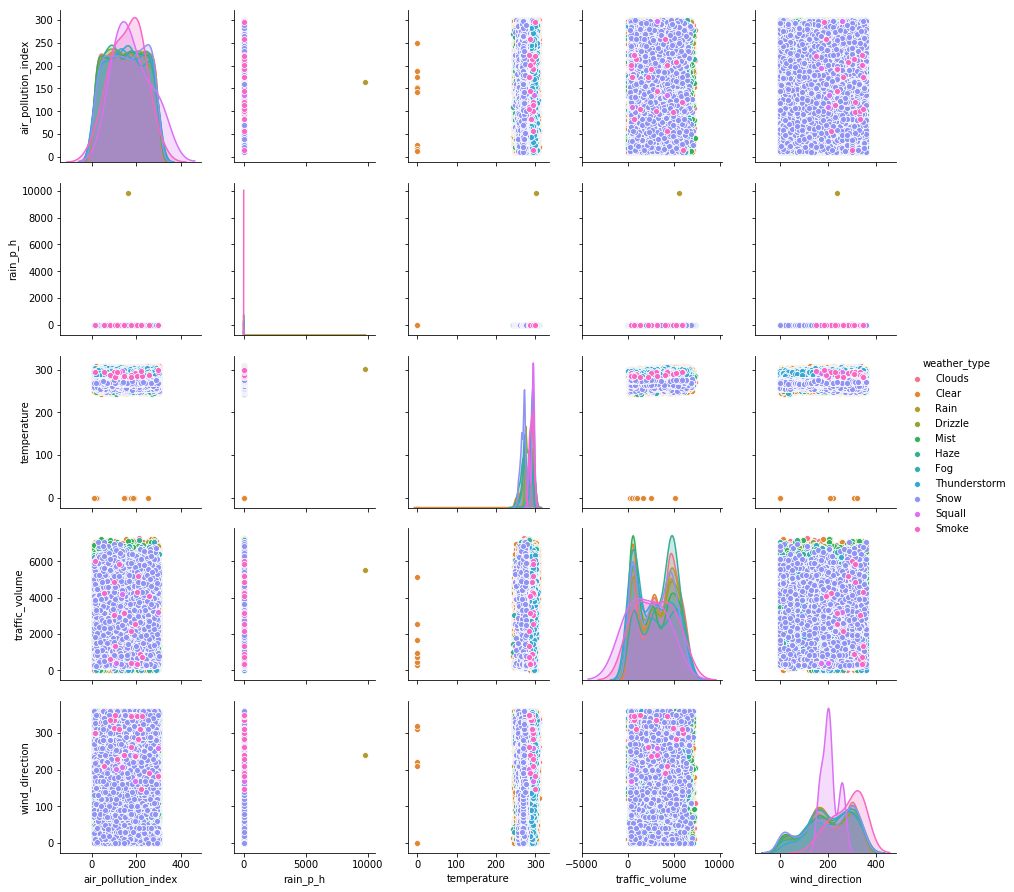

In [15]:
col_cont_key_df=df[col_cont]
num_cont_list=col_cont_key_df.columns.drop("date_time")
sns.pairplot(data=df,vars=num_cont_list,hue='weather_type')

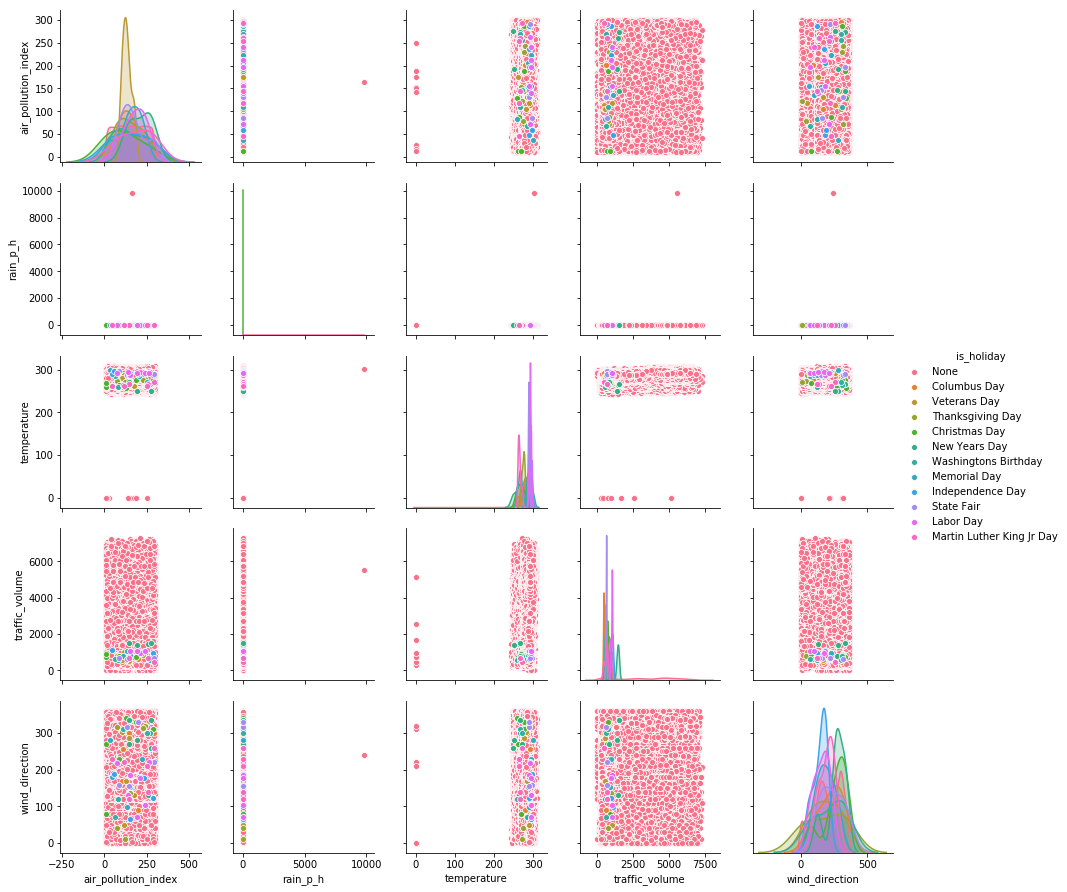

In [20]:
col_cont_key_df=df[col_cont]
num_cont_list=col_cont_key_df.columns.drop("date_time")
sns.pairplot(data=df,vars=num_cont_list,hue='is_holiday')



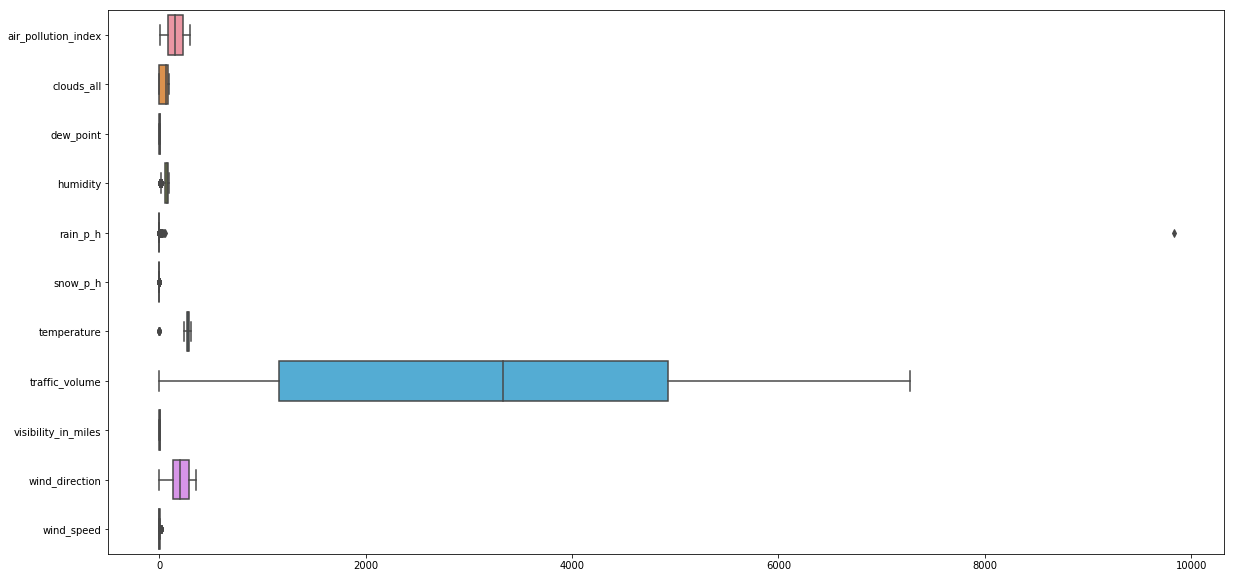

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df,orient="h")

In [22]:
    agg_func=dict(Count='count',Avg='mean',Median='median',Deviation='std',Min='min',Max='max')
    df.groupby("weather_type").agg({
            'traffic_volume': agg_func,
        }).sort_values(('traffic_volume', 'Count'))

C:\Users\Praku\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


traffic_volume                                                 
                      Count          Avg  Median    Deviation    Min     Max
weather_type                                                                
Squall                    4  2061.750000  1818.0  1950.070490  400.0  4211.0
Smoke                    17  2936.176471  3040.0  1976.737218  367.0  6006.0
Thunderstorm            553  2834.573237  2740.0  1973.692351    2.0  6807.0
Fog                     567  2740.603175  2533.0  2115.300227   10.0  7067.0
Haze                    902  3638.919069  4221.0  1818.554410    0.0  7192.0
Drizzle                1204  3201.309801  3212.0  2010.960578  113.0  7110.0
Snow                   2070  3023.850725  3125.5  1921.753683  113.0  7082.0
Rain                   3940  3289.209391  3445.0  2000.328829    0.0  7260.0
Mist                   4047  2943.952310  2783.0  2073.689642    2.0  7260.0
Clear                  9233  3098.786202  3091.0  1978.517629    1.0  7241.0
Clouds                11213  3504.287791  3864.0  1946.827224    1.0  7280.0

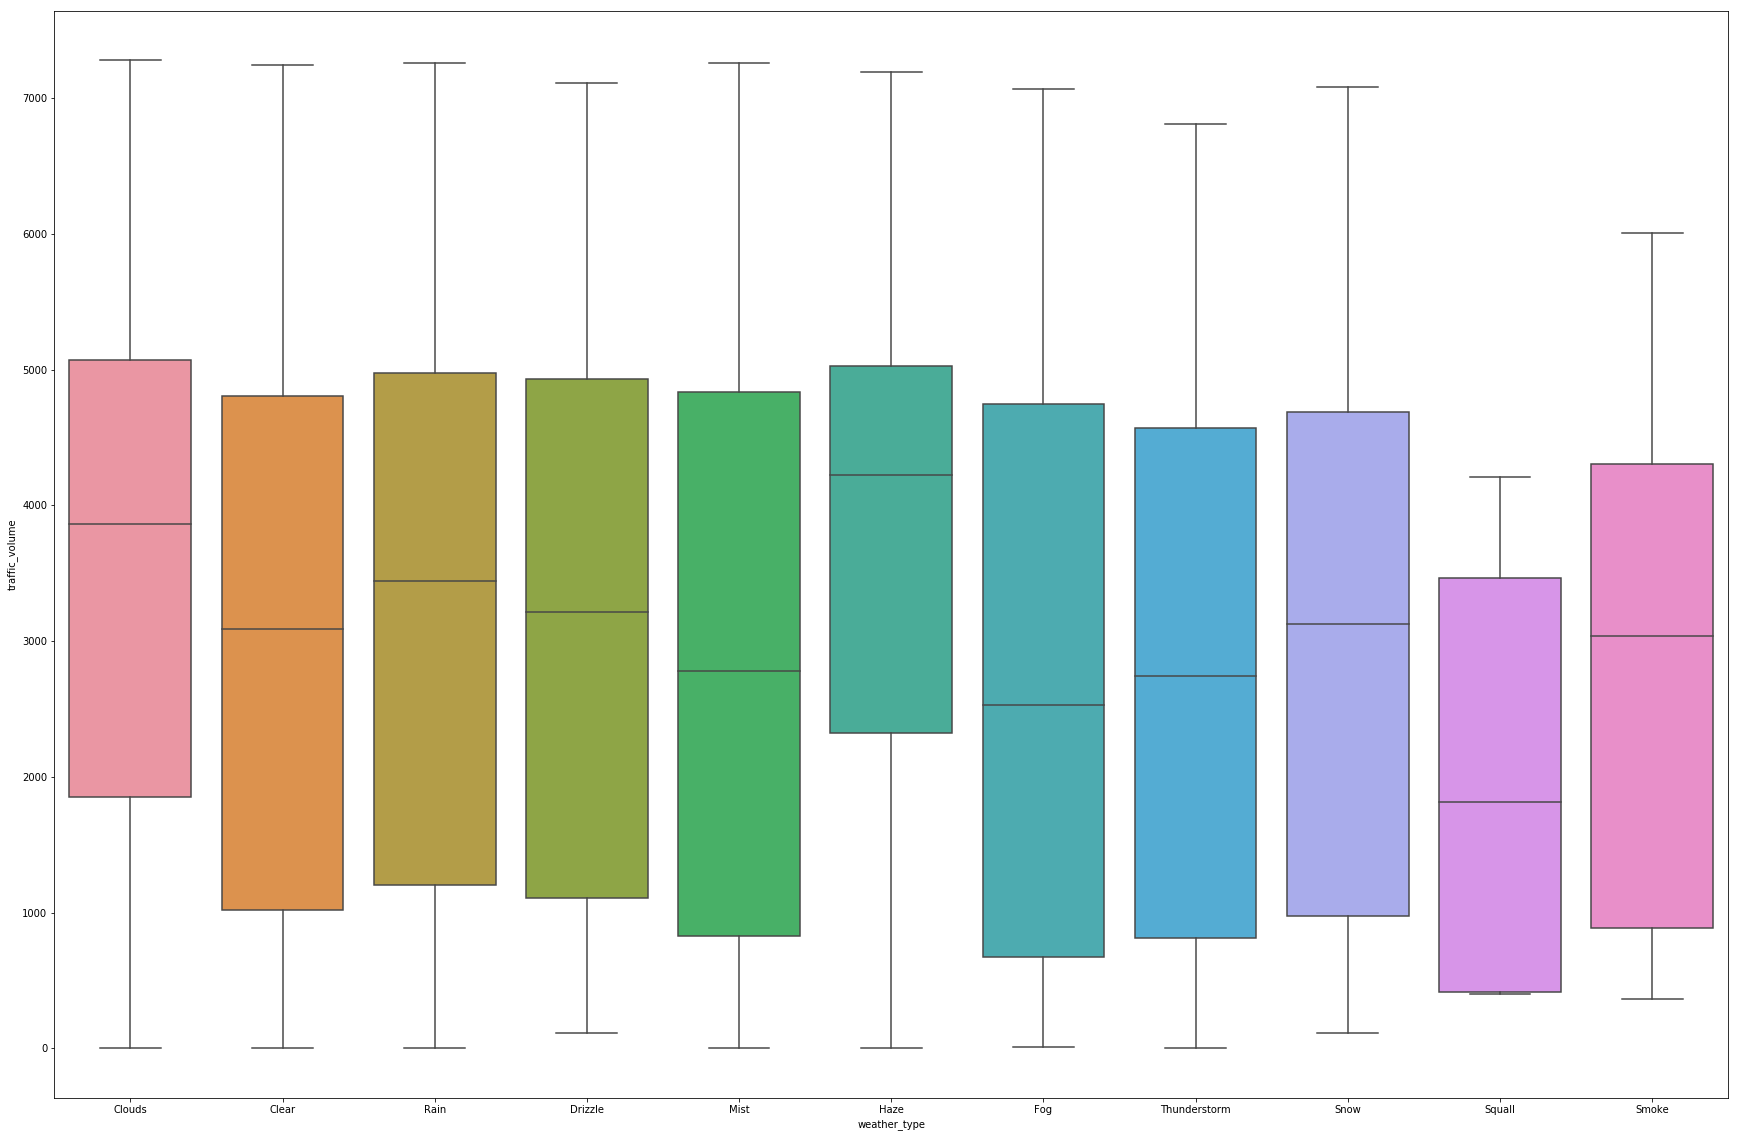

In [23]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=df,x=df["weather_type"],y=df["traffic_volume"])

In [24]:
agg_func=dict(Count='count',Avg='mean',Median='median',Deviation='std',Min='min',Max='max')
df.groupby("is_holiday").agg({
        'traffic_volume': agg_func,
    }).sort_values(('traffic_volume', 'Count'))

C:\Users\Praku\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


traffic_volume                                    \
                                   Count          Avg  Median    Deviation   
is_holiday                                                                   
Independence Day                       3  1044.666667  1060.0    79.122268   
Martin Luther King Jr Day              3   625.333333   698.0   125.862359   
Memorial Day                           3   970.666667   967.0   109.546033   
State Fair                             3   640.333333   655.0    30.746273   
Columbus Day                           4   512.000000   489.0    70.630494   
Labor Day                              4  1035.500000  1052.5    43.054229   
Veterans Day                           4   661.250000   565.5   227.196501   
Washingtons Birthday                   4   638.250000   606.0   102.369836   
Christmas Day                          5   774.600000   732.0    75.185105   
New Years Day                          5  1331.600000  1439.0   302.529007   
Thanksgiving Day                       5   855.400000   833.0    68.926047   
None                               33707  3243.182395  3340.0  1990.883139   

                                          
                             Min     Max  
is_holiday                                
Independence Day           959.0  1115.0  
Martin Luther King Jr Day  480.0   698.0  
Memorial Day               863.0  1082.0  
State Fair                 605.0   661.0  
Columbus Day               455.0   615.0  
Labor Day                  973.0  1064.0  
Veterans Day               514.0  1000.0  
Washingtons Birthday       556.0   785.0  
Christmas Day              712.0   894.0  
New Years Day              798.0  1513.0  
Thanksgiving Day           763.0   929.0  
None                         0.0  7280.0

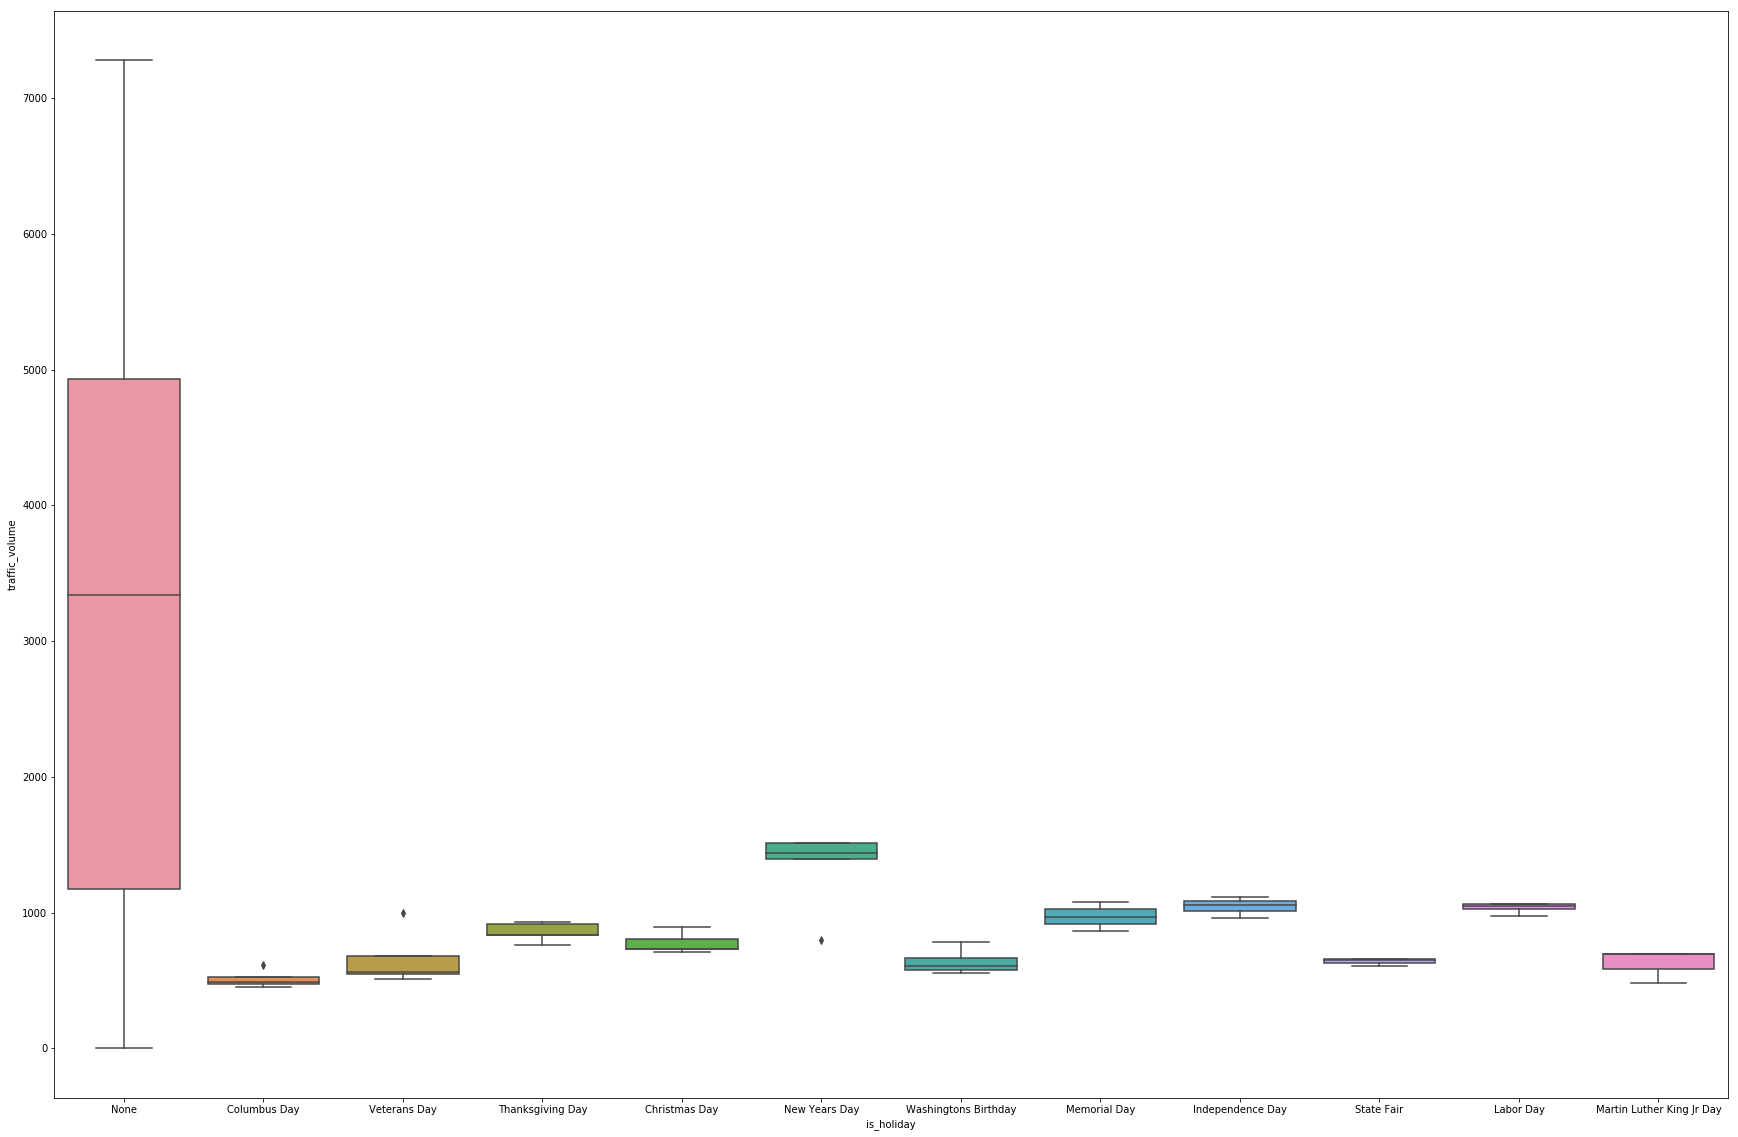

In [25]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=df,x=df["is_holiday"],y=df["traffic_volume"])

In [26]:
agg_func=dict(Count='count',Avg='mean',Median='median',Deviation='std',Min='min',Max='max')
df.groupby("weather_description").agg({
        'traffic_volume': agg_func,
    }).sort_values(('traffic_volume', 'Count'))

C:\Users\Praku\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


traffic_volume                       \
                                             Count          Avg  Median   
weather_description                                                       
shower snow                                      1  5664.000000  5664.0   
shower drizzle                                   1  2010.000000  2010.0   
thunderstorm with drizzle                        2  2297.000000  2297.0   
sleet                                            2  3882.000000  3882.0   
freezing rain                                    2  4314.000000  4314.0   
SQUALLS                                          4  2061.750000  1818.0   
thunderstorm with light drizzle                  4  2858.750000  2868.0   
light shower snow                                4  4570.750000  4135.0   
light rain and snow                              6  3961.166667  5141.5   
light intensity shower rain                      8  4667.500000  4684.0   
proximity thunderstorm with drizzle             11  2810.090909  2491.0   
smoke                                           17  2936.176471  3040.0   
very heavy rain                                 18  2568.833333  1824.5   
thunderstorm with rain                          23  3164.695652  3034.0   
proximity thunderstorm with rain                25  2076.520000  2049.0   
thunderstorm with light rain                    35  2501.857143  2062.0   
heavy intensity drizzle                         40  3158.500000  2975.0   
thunderstorm with heavy rain                    42  2544.619048  2242.5   
proximity shower rain                           54  4491.685185  4618.0   
thunderstorm                                    66  2558.833333  2102.0   
snow                                           190  2695.905263  2670.0   
heavy intensity rain                           311  3069.070740  3039.0   
proximity thunderstorm                         345  2992.915942  3026.0   
drizzle                                        460  3041.732609  2902.0   
fog                                            567  2740.603175  2533.0   
heavy snow                                     587  3085.862010  3181.0   
light intensity drizzle                        703  3309.857752  3606.0   
haze                                           902  3638.919069  4221.0   
moderate rain                                 1105  3113.825339  3024.0   
light snow                                    1280  3031.460938  3145.0   
few clouds                                    1568  3569.742347  3964.5   
Sky is Clear                                  1709  3417.205968  3572.0   
scattered clouds                              2294  3841.502616  4377.0   
light rain                                    2442  3369.970925  3676.5   
broken clouds                                 3379  3481.830719  3841.0   
overcast clouds                               3972  3302.797080  3419.5   
mist                                          4047  2943.952310  2783.0   
sky is clear                                  7524  3026.460393  2991.0   

                                                                  
                                       Deviation     Min     Max  
weather_description                                               
shower snow                                  NaN  5664.0  5664.0  
shower drizzle                               NaN  2010.0  2010.0  
thunderstorm with drizzle            3245.620126     2.0  4592.0  
sleet                                1945.957862  2506.0  5258.0  
freezing rain                         633.567676  3866.0  4762.0  
SQUALLS                              1950.070490   400.0  4211.0  
thunderstorm with light drizzle      2222.659574   598.0  5101.0  
light shower snow                    1030.788493  3921.0  6092.0  
light rain and snow                  2562.275740   521.0  6345.0  
light intensity shower rain           474.318760  3693.0  5254.0  
proximity thunderstorm with drizzle  2072.447995   257.0  5819.0  
smoke                 

In [16]:
pd.crosstab(df["weather_type"],df["is_holiday"], values=df.traffic_volume, aggfunc='median',dropna=False,margins=True,margins_name="Total Median")

is_holiday,Christmas Day,Columbus Day,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday,Total Median
weather_type,,,,,,,,,,,,,
Clear,NaN,494.0,1060.0,1041.0,NaN,NaN,NaN,3096.0,630.0,NaN,786.0,NaN,3091.0
Clouds,803.0,455.0,NaN,973.0,480.0,915.0,1417.0,3869.5,661.0,929.0,536.5,583.0,3864.0
Drizzle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3212.0,NaN,NaN,NaN,NaN,3212.0
Fog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2533.0,NaN,NaN,NaN,NaN,2533.0
Haze,NaN,NaN,NaN,NaN,698.0,NaN,1513.0,4229.0,NaN,833.0,NaN,NaN,4221.0
Mist,732.0,NaN,NaN,NaN,698.0,1082.0,NaN,2786.5,NaN,833.0,NaN,785.0,2783.0
Rain,722.0,NaN,NaN,1064.0,NaN,NaN,NaN,3448.0,NaN,NaN,NaN,NaN,3445.0
Smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3040.0,NaN,NaN,NaN,NaN,3040.0
Snow,894.0,NaN,NaN,NaN,NaN,NaN,1155.5,3126.0,NaN,NaN,NaN,NaN,3125.5


In [28]:
agg_func=dict(Count='count',Avg='mean',Median='median',Deviation='std',Min='min',Max='max')
df.groupby(["is_holiday","weather_type"]).agg({
        'traffic_volume': agg_func,
    }).sort_values(('traffic_volume', 'Count'))

C:\Users\Praku\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


traffic_volume                       \
                                                Count          Avg  Median   
is_holiday                weather_type                                       
Christmas Day             Clear                     0          NaN     NaN   
Thanksgiving Day          Clear                     0          NaN     NaN   
State Fair                Rain                      0          NaN     NaN   
New Years Day             Clear                     0          NaN     NaN   
Independence Day          Mist                      0          NaN     NaN   
Martin Luther King Jr Day Snow                      0          NaN     NaN   
Labor Day                 Mist                      0          NaN     NaN   
Thanksgiving Day          Haze                      1   833.000000   833.0   
                          Clouds                    1   929.000000   929.0   
State Fair                Clouds                    1   661.000000   661.0   
Memorial Day              Mist                      1  1082.000000  1082.0   
Martin Luther King Jr Day Mist                      1   698.000000   698.0   
                          Haze                      1   698.000000   698.0   
                          Clouds                    1   480.000000   480.0   
New Years Day             Haze                      1  1513.000000  1513.0   
Labor Day                 Rain                      1  1064.000000  1064.0   
Christmas Day             Clouds                    1   803.000000   803.0   
                          Mist                      1   732.000000   732.0   
                          Snow                      1   894.000000   894.0   
Labor Day                 Thunderstorm              1  1064.000000  1064.0   
Washingtons Birthday      Mist                      1   785.000000   785.0   
Labor Day                 Clouds                    1   973.000000   973.0   
                          Clear                     1  1041.000000  1041.0   
Columbus Day              Clouds                    1   455.000000   455.0   
New Years Day             Clouds                    2  1417.000000  1417.0   
                          Snow                      2  1155.500000  1155.5   
Veterans Day              Clouds                    2   536.500000   536.5   
                          Clear                     2   786.000000   786.0   
Christmas Day             Rain                      2   722.000000   722.0   
Memorial Day              Clouds                    2   915.000000   915.0   
State Fair                Clear                     2   630.000000   630.0   
Washingtons Birthday      Clouds                    3   589.333333   583.0   
Thanksgiving Day          Mist                      3   838.333333   833.0   
Independence Day          Clear                     3  1044.666667  1060.0   
Columbus Day              Clear                     3   531.000000   494.0   
None                      Squall                    4  2061.750000  1818.0   
                          Smoke                    17  2936.176471  3040.0   
                          Thunderstorm            552  2837.780797  2751.5   
                          Fog                     567  2740.603175  2533.0   
                          Haze                    899  3647.676307  4229.0   
                          Drizzle                1204  3201.309801  3212.0   
                          Snow                   2067  3026.688921  3126.0   
                          Rain                   3937  3291.078740  3448.0   
                          Mist                   4040  2947.614604  2786.5   
                          Clear                  9222  3101.549881  3096.0   
                          Clouds                11198  3507.927576  3869.5   

                                                                     
                                          Deviation     Min     Max  
is_holiday                weather_type                               
Christ

In [29]:
agg_func=dict(Count='count',Avg='mean',Median='median',Deviation='std',Min='min',Max='max')
df.groupby(["weather_type","weather_description"]).agg({
        'traffic_volume': agg_func,
    }).sort_values(('traffic_volume', 'Count'))

C:\Users\Praku\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


traffic_volume               \
                                                          Count          Avg   
weather_type weather_description                                               
Drizzle      shower drizzle                                   1  2010.000000   
Snow         shower snow                                      1  5664.000000   
             sleet                                            2  3882.000000   
Thunderstorm thunderstorm with drizzle                        2  2297.000000   
Rain         freezing rain                                    2  4314.000000   
Thunderstorm thunderstorm with light drizzle                  4  2858.750000   
Squall       SQUALLS                                          4  2061.750000   
Snow         light shower snow                                4  4570.750000   
             light rain and snow                              6  3961.166667   
Rain         light intensity shower rain                      8  4667.500000   
Thunderstorm proximity thunderstorm with drizzle             11  2810.090909   
Smoke        smoke                                           17  2936.176471   
Rain         very heavy rain                                 18  2568.833333   
Thunderstorm thunderstorm with rain                          23  3164.695652   
             proximity thunderstorm with rain                25  2076.520000   
             thunderstorm with light rain                    35  2501.857143   
Drizzle      heavy intensity drizzle                         40  3158.500000   
Thunderstorm thunderstorm with heavy rain                    42  2544.619048   
Rain         proximity shower rain                           54  4491.685185   
Thunderstorm thunderstorm                                    66  2558.833333   
Snow         snow                                           190  2695.905263   
Rain         heavy intensity rain                           311  3069.070740   
Thunderstorm proximity thunderstorm                         345  2992.915942   
Drizzle      drizzle                                        460  3041.732609   
Fog          fog                                            567  2740.603175   
Snow         heavy snow                                     587  3085.862010   
Drizzle      light intensity drizzle                        703  3309.857752   
Haze         haze                                           902  3638.919069   
Rain         moderate rain                                 1105  3113.825339   
Snow         light snow                                    1280  3031.460938   
Clouds       few clouds                                    1568  3569.742347   
Clear        Sky is Clear                                  1709  3417.205968   
Clouds       scattered clouds                              2294  3841.502616   
Rain         light rain                                    2442  3369.970925   
Clouds       broken clouds                                 3379  3481.830719   
             overcast clouds                               3972  3302.797080   
Mist         mist                                          4047  2943.952310   
Clear        sky is clear                                  7524  3026.460393   

                                                                               \
                                                  Median    Deviation     Min   
weather_type weather_description                                                
Drizzle      shower drizzle                       2010.0          NaN  2010.0   
Snow         shower snow                          5664.0          NaN  5664.0   
             sleet                                3882.0  1945.957862  2506.0   
Thunderstorm thunderstorm with drizzle            2297.0  3245.620126     2.0   
Rain         freezing rain                        4314.0   633.567676  3866.0   
Thunderstorm thunderstorm with light drizzle      2868.0  2222.659574   598.0   
Squall       SQUALLS                   

In [17]:
# one-hot encoding
cat_col=['weather_type','is_holiday','weather_description']
one_hot=pd.get_dummies(df[cat_col])
traffic_vol_procsd_df=pd.concat([df,one_hot],axis=1)

In [19]:
one_hot['traffic_volume']=df['traffic_volume']
one_hot.corr()['traffic_volume'].sort_values()

weather_description_sky is clear                          -0.057465
weather_description_mist                                  -0.054895
weather_type_Mist                                         -0.054895
weather_type_Clear                                        -0.043552
weather_type_Fog                                          -0.032788
weather_description_fog                                   -0.032788
weather_type_Snow                                         -0.027760
weather_type_Thunderstorm                                 -0.026283
weather_description_light snow                            -0.020803
weather_description_snow                                  -0.020562
weather_description_proximity thunderstorm with rain      -0.015908
weather_description_thunderstorm                          -0.015143
is_holiday_Christmas Day                                  -0.015070
is_holiday_Columbus Day                                   -0.014915
is_holiday_Thanksgiving Day                     

In [21]:
traffic_dt_df=traffic_vol_procsd_df.drop(columns=['weather_type','is_holiday','weather_description'])
traffic_dt_df.set_index('date_time',inplace=True)
traffic_dt_df.head(10)

,air_pollution_index,clouds_all,dew_point,humidity,rain_p_h,snow_p_h,source,temperature,traffic_volume,visibility_in_miles,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,121,40,1,89,0.0,0.0,train,288.28,5545.0,1,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,178,75,1,67,0.0,0.0,train,289.36,4516.0,1,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,113,90,2,66,0.0,0.0,train,289.58,4767.0,2,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,20,90,5,66,0.0,0.0,train,290.13,5026.0,5,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,281,75,7,65,0.0,0.0,train,291.14,4918.0,7,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 14:00:00,23,1,6,65,0.0,0.0,train,291.72,5181.0,6,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 15:00:00,184,1,7,64,0.0,0.0,train,293.17,5584.0,7,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 16:00:00,167,1,7,64,0.0,0.0,train,293.86,6015.0,7,...,0,0,0,0,0,0,0,0,0,0
2012-10-02 17:00:00,119,20,6,63,0.0,0.0,train,294.14,5791.0,6,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_final = traffic_dt_df[traffic_dt_df.source=="train"]
test_final = traffic_dt_df[traffic_dt_df.source=="test"]

In [23]:
train_final.drop(columns="source",inplace=True)
test_final.drop(columns="source",inplace=True)


C:\Users\Nagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
#split train and data
train_X = train_final.drop(columns=["traffic_volume"])
train_Y = train_final["traffic_volume"]
test_X = test_final.drop(columns=["traffic_volume"])
test_Y = test_final["traffic_volume"]

In [25]:
train_final[train_final["traffic_volume"]==0]

,air_pollution_index,clouds_all,dew_point,humidity,rain_p_h,snow_p_h,temperature,traffic_volume,visibility_in_miles,wind_direction,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
date_time,,,,,,,,,,,,,,,,,,,,,
2016-07-23 18:00:00,139,40,6,83,0.0,0.0,296.68,0.0,6,130,...,0,0,0,0,0,0,0,0,0,0
2016-07-23 23:00:00,257,90,5,94,0.0,0.0,295.90,0.0,5,264,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

model_metrics={}
def calc_metrics_and_predict(model,model_label,train_X,test_X,train_Y,test_Y,test_final, scaler,cv):
    if scaler is not None:
        # Scaling
        print("Scaling applied")
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)
    print("fit data")    
    model.fit(train_X, train_Y)
    print("predict data")
    yhat_train = model.predict(train_X)
    rmse=np.sqrt(mean_squared_error(train_Y, yhat_train))
    mae=mean_absolute_error(train_Y,yhat_train)
    #mape=np.mean(np.abs((train_Y - yhat_train) / train_Y)) * 100
    mape=mae * 100
    if cv==True:
        print("Cross-Validation score")
        scores = cross_val_score(model, train_X, train_Y, cv = 10,scoring='neg_mean_squared_error') 
        avg_cross_val_score = np.mean(np.sqrt(np.abs(scores)))
    else:
        avg_cross_val_score=None
    #avg_cross_val_score=0
    model_metrics[model_label]=[rmse,mae,mape,avg_cross_val_score]
    # Predict test data and add to test_fnal dataframe
    test_final[model_label] =  model.predict(test_X)
    return model_metrics

In [28]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
rmf = RandomForestRegressor(n_jobs = -1)

model_metrics=calc_metrics_and_predict(rmf,'Random Forest',train_X,test_X,train_Y,test_Y,test_final,None, True)
model_metrics

fit data


C:\Users\Nagi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [782.4216663454654,
  596.1171199999999,
  59611.711999999985,
  2088.4960149454646]}

In [29]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(train_X, train_Y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [30]:
sel.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [31]:
selected_feat= train_X.columns[(sel.get_support())]
len(selected_feat)

9

In [32]:
selected_feat

Index(['air_pollution_index', 'clouds_all', 'dew_point', 'humidity',
       'rain_p_h', 'temperature', 'visibility_in_miles', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [33]:
df_selected_feat = df[['air_pollution_index', 'clouds_all', 'dew_point', 'humidity',
       'rain_p_h', 'temperature', 'visibility_in_miles', 'wind_direction',
       'wind_speed','traffic_volume','source','date_time']]

In [34]:
df_selected_feat.set_index('date_time',inplace=True)

In [35]:
train_sel_final = df_selected_feat[df_selected_feat.source=="train"]
test_sel_final = df_selected_feat[df_selected_feat.source=="test"]

In [36]:
train_sel_final.drop(columns="source",inplace=True)
test_sel_final.drop(columns="source",inplace=True)

C:\Users\Nagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


#split train data
train_sel_X = train_sel_final.drop(columns=["traffic_volume"])
train_sel_Y = train_sel_final["traffic_volume"]
test_sel_X = test_sel_final.drop(columns=["traffic_volume"])
test_sel_Y = test_sel_final["traffic_volume"]

In [39]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
rmf_sel = RandomForestRegressor(n_jobs = -1)
model_metrics=calc_metrics_and_predict(rmf_sel,'Random Forest',train_sel_X,test_sel_X,train_sel_Y,test_sel_Y,test_final,None, True)
model_metrics

fit data


C:\Users\Nagi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565]}

NameError: name 'neigh' is not defined

In [45]:
# Linear regression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
        
model_metrics=calc_metrics_and_predict(linear_model,'linear_reg',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774]}

In [46]:
# linear model with cross-validation
from sklearn.model_selection import cross_val_score
a = cross_val_score(linear_model, train_X, train_Y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(np.abs(a)))

2317.882814571774

In [47]:
# Regularization technique
from sklearn.linear_model import Ridge, Lasso 

# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(train_X, train_Y) 
    scores = cross_val_score(ridgeModel, train_X, train_Y, cv = 10,scoring='neg_mean_squared_error') 
    avg_cross_val_score = np.mean(np.sqrt(np.abs(scores)))
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 2322.2824575194745
0.5 : 2326.2771174525674
0.75 : 2329.931653955561
1.0 : 2333.297873231376
1.25 : 2336.417006901024
1.5 : 2339.322130700838
1.75 : 2342.040078119703
2.0 : 2344.592879172169


In [48]:
#Building ridge model
ridgeModel = Ridge(alpha = 1 * 0.25) 
model_metrics=calc_metrics_and_predict(ridgeModel,'regularization',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745]}

In [42]:
# KNN implementation
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import PolynomialFeatures
#from math import sqrt


# Scaling
#train_scaled_X = StandardScaler().fit_transform(train_X)
      

#df_len=round(sqrt(len(traffic_dt_df)))
#Train Model and Predict  
#for k in range(3,7):
#    neigh = KNeighborsRegressor(n_neighbors = k).fit(train_scaled_X,train_Y)
#    yhat_train = neigh.predict(train_scaled_X)
#    train_rmse=sqrt(mean_squared_error(train_Y,yhat_train))
#    print("RMSE for train : ",train_rmse," with k =",k)
    

In [49]:
#Predict on testing data:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors = 3)
model_metrics=calc_metrics_and_predict(neigh,'KNN',train_X,test_X,train_Y,test_Y,test_final,StandardScaler(),True)
model_metrics

Scaling applied
fit data

C:\Users\Nagi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nagi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':



predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296]}

In [50]:
# Gaussian
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()

model_metrics=calc_metrics_and_predict(NB,'NB_Gaussian',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076]}

In [45]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

NB=MultinomialNB()

model_metrics=calc_metrics_and_predict(NB,'NB_MultinomialNB',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Praku\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158]}

In [46]:
# Bernoulli
from sklearn.naive_bayes import BernoulliNB

BL=BernoulliNB()

model_metrics=calc_metrics_and_predict(BL,'NB_BernoulliNB',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Praku\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158],
 'NB_BernoulliNB': [3511.3686804794297,
  2898.5274074074073,
  289852.74074074073,
  3373.367451175202]}

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfm=RandomForestRegressor(random_state = 0, criterion='mse',n_jobs = -1, 
        n_estimators = 100, max_depth = None,min_samples_leaf=1,min_samples_split=2)

model_metrics=calc_metrics_and_predict(rfm,'Random_forest',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985]}

In [48]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = DecisionTreeRegressor()


# Choose some parameter combinations to try
parameters = {'criterion' : ['mse','mae','friedman_mse'],
              'max_features': ['log2', 'sqrt','auto'],
              'max_depth': range(2,16,2), 
              'min_samples_split': range(2,16,2),
              'min_samples_leaf': range(2,16,2)             

             }




#print("Grid search started")
#start_time = time.time()
# Run the grid search
#grid_obj = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
#grid_obj = grid_obj.fit(train_X, train_Y)
#elapsed_time = time.time() - start_time
#print(elapsed_time)
# Set the clf to the best combination of parameters
#clf = grid_obj.best_estimator_
#clf

In [49]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=5, min_samples_split=8, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')


model_metrics=calc_metrics_and_predict(clf,'Decision_Tree',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158],
 'NB_BernoulliNB': [3511.3686804794297,
  2898.5274074074073,
  289852.74074074073,
  3373.367451175202],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Decision_Tree': [1888.753369412787,
  1622.5142087938104,
  162251.42087938104,
  2080.1723835887537]}

parameters = {'criterion' : ['mse','mae'],
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [80, 90, 100, 110], 
              'min_samples_split': [8,10,12],
              'min_samples_leaf': [3, 4, 5]              

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
# Ada boost classifier
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
#dtree = DecisionTreeClassifier(criterion='',max_depth=1)

adabst_fit = AdaBoostRegressor(base_estimator= clf,n_estimators=5000,learning_rate=0.05,random_state=42)

model_metrics=calc_metrics_and_predict(clf,'Adaboost',train_X,test_X,train_Y,test_Y,test_final,None,True)
model_metrics

fit data
predict data
Cross-Validation score


C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158],
 'NB_BernoulliNB': [3511.3686804794297,
  2898.5274074074073,
  289852.74074074073,
  3373.367451175202],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Decision_Tree': [1888.753369412787,
  1622.5142087938104,
  162251.42087938104,
  2080.1723835887537],
 'Adaboost': [1791.6031033212628,
  1510.2387785097412,
  151023.87785097412,
  2066.965563646046]}

In [51]:
test_final.head(10)

,air_pollution_index,clouds_all,dew_point,humidity,rain_p_h,snow_p_h,temperature,traffic_volume,visibility_in_miles,wind_direction,...,weather_description_very heavy rain,linear_reg,regularization,KNN,NB_Gaussian,NB_MultinomialNB,NB_BernoulliNB,Random_forest,Decision_Tree,Adaboost
date_time,,,,,,,,,,,,,,,,,,,,,
2017-05-18 00:00:00,73,90,4,63,0.0,0.0,285.15,NaN,4,27,...,0,3063.944187,3064.095775,3283.666667,2227.0,5667.0,356.0,2870.47,2538.555556,3180.899545
2017-05-18 00:00:00,251,90,4,63,0.0,0.0,285.15,NaN,4,27,...,0,3097.949738,3098.055398,2397.000000,1823.0,6082.0,357.0,2581.62,2943.952310,2943.952310
2017-05-18 00:00:00,75,90,1,56,0.0,0.0,285.15,NaN,1,0,...,0,3278.025909,3277.911803,2740.666667,2227.0,1945.0,304.0,3588.33,3042.742555,4306.000000
2017-05-18 01:00:00,98,90,2,56,0.0,0.0,284.79,NaN,2,351,...,0,3008.777864,3009.299565,3414.666667,3365.0,6303.0,356.0,2478.97,3927.222222,3180.899545
2017-05-18 01:00:00,283,90,1,56,0.0,0.0,284.79,NaN,1,351,...,0,3169.382424,3169.519608,3232.333333,2317.0,690.0,357.0,2782.41,2943.952310,2943.952310
2017-05-18 02:00:00,115,90,4,49,0.0,0.0,284.29,NaN,4,27,...,0,2882.951102,2883.467485,2175.666667,1329.0,547.0,356.0,3679.24,2777.000000,3180.899545
2017-05-18 02:00:00,48,90,1,49,0.0,0.0,284.29,NaN,1,27,...,0,3064.071176,3064.133844,2011.666667,5451.0,1141.0,357.0,3844.51,2943.952310,2943.952310
2017-05-18 02:00:00,133,90,1,49,0.0,0.0,284.29,NaN,1,27,...,0,2957.715702,2957.722866,1631.000000,3969.0,4867.0,338.0,3486.72,3042.742555,3180.899545
2017-05-18 03:00:00,130,90,6,60,0.0,0.0,283.51,NaN,6,36,...,0,2918.161602,2918.667220,3219.000000,1329.0,547.0,356.0,3209.81,3447.090909,3180.899545


In [52]:
# Gradientboost Classifier
from sklearn.ensemble import GradientBoostingRegressor

gbc_fit = GradientBoostingRegressor(loss='quantile',learning_rate=0.05,n_estimators=200,min_samples_split=8,min_samples_leaf=5,max_depth=100,random_state=42,max_features='log2')

#gbc_fit = GradientBoostingRegressor(base_estimator= clf,n_estimators=5000,learning_rate=0.05,random_state=42)

    
model_metrics=calc_metrics_and_predict(gbc_fit,'Gradient_boosting',train_X,test_X,train_Y,test_Y,test_final,None,False)
model_metrics

fit data
predict data


C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158],
 'NB_BernoulliNB': [3511.3686804794297,
  2898.5274074074073,
  289852.74074074073,
  3373.367451175202],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Decision_Tree': [1888.753369412787,
  1622.5142087938104,
  162251.42087938104,
  2080.1723835887537],
 'Adaboost': [1791.6031033212628,
  1510.2387785097412,
  151023.87785097412,
  2066.965563646046],
 'Gradient_boosting': [2382.7757013557734,
  1745.850447430809,
  174585.0

In [53]:
# Xgboost Classifier
import xgboost as xgb

xgb_fit = xgb.XGBRegressor(learning_rate=0.05,n_estimators=100,min_samples_split=8,min_samples_leaf=5,max_depth=100,random_state=42,max_features='log2' )



model_metrics=calc_metrics_and_predict(xgb_fit,'XGBoosting',train_X,test_X,train_Y,test_Y,test_final,None,False)
model_metrics

fit data
[01:06:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Praku\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Praku\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


predict data


C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158],
 'NB_BernoulliNB': [3511.3686804794297,
  2898.5274074074073,
  289852.74074074073,
  3373.367451175202],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Decision_Tree': [1888.753369412787,
  1622.5142087938104,
  162251.42087938104,
  2080.1723835887537],
 'Adaboost': [1791.6031033212628,
  1510.2387785097412,
  151023.87785097412,
  2066.965563646046],
 'Gradient_boosting': [2382.7757013557734,
  1745.850447430809,
  174585.0

In [55]:
from vecstack import stacking

# Get your data

# Initialize 1st level models

# Get your stacking features in a single line
#S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, verbose = 2)

# Use 2nd level model with stacking features
#Complete examples
#Regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from vecstack import stacking


# Caution! All models and parameter values are just 
# demonstrational and shouldn't be considered as recommended.
# Initialize 1st level models.
models = [
    linear_model,
    neigh,
    rfm,
#    xgb_fit
    ]
    
# Compute stacking features
S_train, S_test = stacking(models, train_X, train_Y, test_X, 
    regression = True, metric = mean_absolute_error, n_folds = 4, 
    shuffle = True, random_state = 0, verbose = 2)

# Initialize 2nd level model
#model = XGBRegressor(seed = 0, n_jobs = -1, learning_rate = 0.1,     n_estimators = 100)
model_stacking= xgb_fit

# Fit 2nd level model
model_stacking = model_stacking.fit(S_train, train_Y)

# Predict
y_pred = model_stacking.predict(S_train)

# Final prediction score
print('Final prediction score: [%.8f]' % mean_absolute_error(train_Y, y_pred))

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [1702.45979605]
    fold  1:  [1697.26028233]
    fold  2:  [1763.97783279]
    fold  3:  [1685.22933364]
    ----
    MEAN:     [1712.23181120] + [30.52221937]
    FULL:     [1712.23107806]

model  1:     [KNeighborsRegressor]
    fold  0:  [1829.90898317]
    fold  1:  [1850.29244687]
    fold  2:  [1848.84390186]
    fold  3:  [1840.42451898]
    ----
    MEAN:     [1842.36746272] + [8.12001202]
    FULL:     [1842.36732840]

model  2:     [RandomForestRegressor]
    fold  0:  [1531.08674804]
    fold  1:  [1520.99247571]
    fold  2:  [1520.37187152]
    fold  3:  [1515.16996563]
    ----
    MEAN:     [1521.90526522] + [5.76299333]
    FULL:     [1521.90551022]

[01:12:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Praku\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Praku\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Final prediction score: [74.73796078]


In [56]:
model_metrics=calc_metrics_and_predict(model_stacking,'Stacking',train_X,test_X,train_Y,test_Y,test_final,None,False)
model_metrics

fit data
[01:12:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Praku\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Praku\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


predict data


C:\Users\Praku\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'NB_MultinomialNB': [2770.695740458088,
  2236.7110222222223,
  223671.10222222222,
  2848.478515459158],
 'NB_BernoulliNB': [3511.3686804794297,
  2898.5274074074073,
  289852.74074074073,
  3373.367451175202],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Decision_Tree': [1888.753369412787,
  1622.5142087938104,
  162251.42087938104,
  2080.1723835887537],
 'Adaboost': [1791.6031033212628,
  1510.2387785097412,
  151023.87785097412,
  2066.965563646046],
 'Gradient_boosting': [2382.7757013557734,
  1745.850447430809,
  174585.0

In [57]:
model_comparison_df=pd.DataFrame.from_dict(model_metrics)
model_comparison_df

,linear_reg,regularization,KNN,NB_Gaussian,NB_MultinomialNB,NB_BernoulliNB,Random_forest,Decision_Tree,Adaboost,Gradient_boosting,XGBoosting,Stacking
0,1948.595057,1948.597360,1537.618109,2800.902178,2770.695740,3511.368680,656.912671,1888.753369,1791.603103,2382.775701,86.696319,86.696319
1,1694.136633,1694.157540,1247.491467,2237.770667,2236.711022,2898.527407,547.471942,1622.514209,1510.238779,1745.850447,54.042419,54.042419
2,169413.663267,169415.754008,124749.146667,223777.066667,223671.102222,289852.740741,54747.194193,162251.420879,151023.877851,174585.044743,5404.241881,5404.241881
3,2317.882815,2322.282458,2259.106144,2895.299283,2848.478515,3373.367451,2011.831460,2080.172384,2066.965564,NaN,NaN,NaN


In [58]:
test_final.head(10)

,air_pollution_index,clouds_all,dew_point,humidity,rain_p_h,snow_p_h,temperature,traffic_volume,visibility_in_miles,wind_direction,...,KNN,NB_Gaussian,NB_MultinomialNB,NB_BernoulliNB,Random_forest,Decision_Tree,Adaboost,Gradient_boosting,XGBoosting,Stacking
date_time,,,,,,,,,,,,,,,,,,,,,
2017-05-18 00:00:00,73,90,4,63,0.0,0.0,285.15,NaN,4,27,...,3283.666667,2227.0,5667.0,356.0,2870.47,2538.555556,3180.899545,5014.532370,2657.645508,2657.645508
2017-05-18 00:00:00,251,90,4,63,0.0,0.0,285.15,NaN,4,27,...,2397.000000,1823.0,6082.0,357.0,2581.62,2943.952310,2943.952310,5189.939669,2302.231934,2302.231934
2017-05-18 00:00:00,75,90,1,56,0.0,0.0,285.15,NaN,1,0,...,2740.666667,2227.0,1945.0,304.0,3588.33,3042.742555,4306.000000,5156.561048,3533.330322,3533.330322
2017-05-18 01:00:00,98,90,2,56,0.0,0.0,284.79,NaN,2,351,...,3414.666667,3365.0,6303.0,356.0,2478.97,3927.222222,3180.899545,4748.406174,3602.746826,3602.746826
2017-05-18 01:00:00,283,90,1,56,0.0,0.0,284.79,NaN,1,351,...,3232.333333,2317.0,690.0,357.0,2782.41,2943.952310,2943.952310,4678.734829,3170.565918,3170.565918
2017-05-18 02:00:00,115,90,4,49,0.0,0.0,284.29,NaN,4,27,...,2175.666667,1329.0,547.0,356.0,3679.24,2777.000000,3180.899545,4845.348168,3913.946045,3913.946045
2017-05-18 02:00:00,48,90,1,49,0.0,0.0,284.29,NaN,1,27,...,2011.666667,5451.0,1141.0,357.0,3844.51,2943.952310,2943.952310,4905.012356,3093.566406,3093.566406
2017-05-18 02:00:00,133,90,1,49,0.0,0.0,284.29,NaN,1,27,...,1631.000000,3969.0,4867.0,338.0,3486.72,3042.742555,3180.899545,4361.000892,3659.212646,3659.212646
2017-05-18 03:00:00,130,90,6,60,0.0,0.0,283.51,NaN,6,36,...,3219.000000,1329.0,547.0,356.0,3209.81,3447.090909,3180.899545,4968.563143,3700.770020,3700.770020


In [59]:
test_final.columns

Index(['air_pollution_index', 'clouds_all', 'dew_point', 'humidity',
       'rain_p_h', 'snow_p_h', 'temperature', 'traffic_volume',
       'visibility_in_miles', 'wind_direction', 'wind_speed',
       'weather_type_Clear', 'weather_type_Clouds', 'weather_type_Drizzle',
       'weather_type_Fog', 'weather_type_Haze', 'weather_type_Mist',
       'weather_type_Rain', 'weather_type_Smoke', 'weather_type_Snow',
       'weather_type_Squall', 'weather_type_Thunderstorm',
       'is_holiday_Christmas Day', 'is_holiday_Columbus Day',
       'is_holiday_Independence Day', 'is_holiday_Labor Day',
       'is_holiday_Martin Luther King Jr Day', 'is_holiday_Memorial Day',
       'is_holiday_New Years Day', 'is_holiday_None', 'is_holiday_State Fair',
       'is_holiday_Thanksgiving Day', 'is_holiday_Veterans Day',
       'is_holiday_Washingtons Birthday', 'weather_description_SQUALLS',
       'weather_description_Sky is Clear', 'weather_description_broken clouds',
       'weather_description_drizzle

In [62]:
models_lst=['linear_reg', 'regularization',
       'KNN', 'NB_Gaussian', 'NB_MultinomialNB', 'NB_BernoulliNB',
       'Random_forest', 'Decision_Tree', 'Adaboost', 'Gradient_boosting', 'XGBoosting',
       'Stacking']
for i in models_lst:
    Linear_submission = test_final[[i]]
    Linear_submission.head(2)
    #Linear_submission.columns = submission_df.columns
    Linear_submission.to_csv(i+".csv")
 

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#Print model report:
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(train_Y.values, dtrain_predictions)))
    
#Predict on testing data:
test_final["res_linear"] =  model.predict(test_X)

In [ ]:
from sklearn import metrics
print(metrics.SCORERS.keys())

In [54]:
from vecstack import stacking
import xgboost as xgb

# Get your data

# Initialize 1st level models

# Get your stacking features in a single line
#S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, verbose = 2)

# Use 2nd level model with stacking features
#Complete examples
#Regression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from vecstack import stacking

linear_model = LinearRegression()
# Caution! All models and parameter values are just 
# demonstrational and shouldn't be considered as recommended.
# Initialize 1st level models.
models = [
    linear_model,
    neigh,
    rfm,
#    xgb_fit
    ]
    
# Compute stacking features
S_train, S_test = stacking(models, train_sel_X, train_sel_Y, test_sel_X, 
    regression = True, metric = mean_absolute_error, n_folds = 4, 
    shuffle = True, random_state = 0, verbose = 2)

# Initialize 2nd level model
#model = XGBRegressor(seed = 0, n_jobs = -1, learning_rate = 0.1,     n_estimators = 100)

xgb_fit = xgb.XGBRegressor(learning_rate=0.05,n_estimators=100,min_samples_split=8,min_samples_leaf=5,max_depth=100,random_state=42,max_features='log2' )
model_stacking= xgb_fit

# Fit 2nd level model
model_stacking = model_stacking.fit(S_train, train_sel_Y)

# Predict
y_pred = model_stacking.predict(S_train)

# Final prediction score
print('Final prediction score: [%.8f]' % mean_absolute_error(train_sel_Y, y_pred))

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [1729.84540389]
    fold  1:  [1728.28708291]
    fold  2:  [1844.76236550]
    fold  3:  [1712.65231582]
    ----
    MEAN:     [1753.88679203] + [52.89608996]
    FULL:     [1753.88532118]

model  1:     [KNeighborsRegressor]
    fold  0:  [1832.15438097]
    fold  1:  [1853.81460852]
    fold  2:  [1850.25577812]
    fold  3:  [1840.79625459]
    ----
    MEAN:     [1844.25525555] + [8.45256401]
    FULL:     [1844.25518025]

model  2:     [RandomForestRegressor]
    fold  0:  [1540.76472387]
    fold  1:  [1536.39434226]
    fold  2:  [1542.65349532]
    fold  3:  [1527.65539054]
    ----
    MEAN:     [1536.86698800] + [5.78258017]
    FULL:     [1536.86708948]

[12:13:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nagi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Nagi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Final prediction score: [73.93495731]


In [55]:
model_metrics=calc_metrics_and_predict(model_stacking,'Stacking',train_X,test_X,train_Y,test_Y,test_final,None,False)
model_metrics

fit data
[12:19:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nagi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Nagi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


predict data


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Stacking': [86.69631891205215, 54.04241880932207, 5404.241880932207, None]}

In [57]:
model_metrics=calc_metrics_and_predict(model_stacking,'Stacking_selected_features',train_sel_X,test_sel_X,train_sel_Y,test_sel_Y,test_final,None,False)
model_metrics

fit data
[12:24:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nagi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Nagi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


predict data


C:\Users\Nagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'Random Forest': [785.9931992456707,
  599.1793244444444,
  59917.93244444444,
  2104.7164109063565],
 'linear_reg': [1948.5950573699554,
  1694.1366326680338,
  169413.66326680337,
  2317.882814571774],
 'regularization': [1948.5973598551234,
  1694.1575400799602,
  169415.75400799603,
  2322.2824575194745],
 'KNN': [1537.6181094724977,
  1247.4914666666664,
  124749.14666666664,
  2259.106143630296],
 'NB_Gaussian': [2800.90217769336,
  2237.770666666667,
  223777.06666666668,
  2895.2992832541076],
 'Random_forest': [656.9126709817654,
  547.4719419259259,
  54747.194192592586,
  2011.831460219985],
 'Stacking': [89.16279995512255, 55.45021153626619, 5545.021153626619, None],
 'Stacking_selected_features': [89.16279995512255,
  55.45021153626619,
  5545.021153626619,
  None]}

In [58]:
models_lst=['Stacking',
       'Stacking_selected_features']
for i in models_lst:
    Linear_submission = test_final[[i]]
    Linear_submission.head(2)
    #Linear_submission.columns = submission_df.columns
    Linear_submission.to_csv(i+".csv")
 